In [25]:
import cv2
import random
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [26]:
print(cv2.__version__)

3.4.8


In [28]:
image_path = "car_4.jpg"

In [29]:
image = cv2.imread(image_path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [30]:
def plot_images(img1, img2, title1="", title2=""):
    fig = plt.figure(figsize=[15,15])
    ax1 = fig.add_subplot(121)
    ax1.imshow(img1, cmap="gray")
    ax1.set(xticks=[], yticks=[], title=title1)

    ax2 = fig.add_subplot(122)
    ax2.imshow(img2, cmap="gray")
    ax2.set(xticks=[], yticks=[], title=title2)

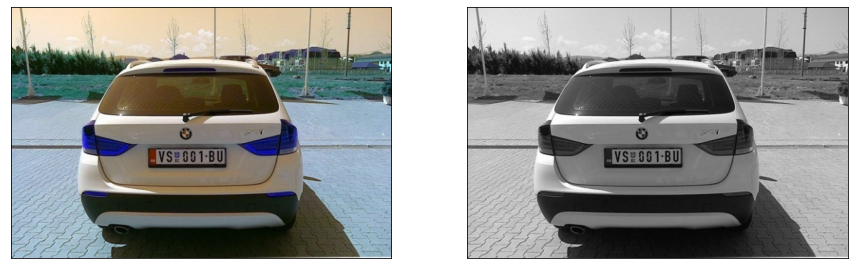

In [31]:
plot_images(image, gray)

In [32]:
blur = cv2.bilateralFilter(gray, 11,90, 90)

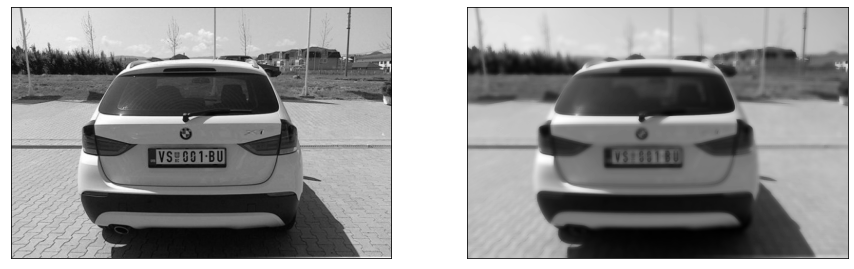

In [33]:
plot_images(gray, blur)

In [34]:
edges = cv2.Canny(blur, 30, 200)

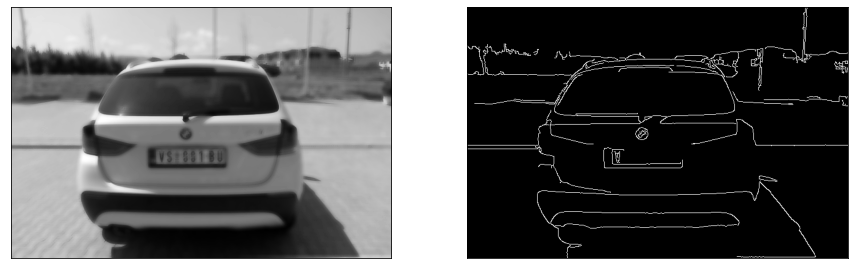

In [35]:
plot_images(blur, edges)

In [36]:
cnts, new = cv2.findContours(edges.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

ValueError: too many values to unpack (expected 2)

In [16]:
image_copy = image.copy()

In [17]:
_ = cv2.drawContours(image_copy, cnts, -1, (255,0,255),2)

NameError: name 'cnts' is not defined

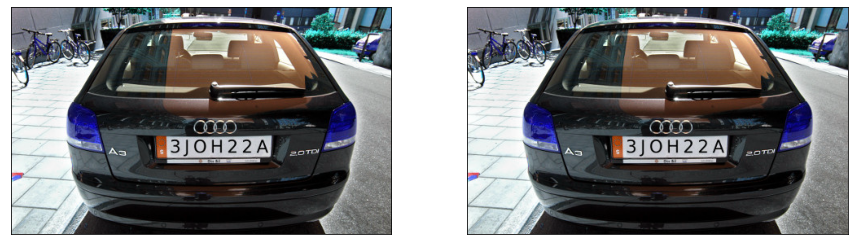

In [18]:
plot_images(image, image_copy)

In [19]:
cnts = sorted(cnts, key=cv2.contourArea, reverse=True)[:30]

NameError: name 'cnts' is not defined

In [20]:
image_copy = image.copy()
_ = cv2.drawContours(image_copy, cnts, -1, (255,0,255),2)

NameError: name 'cnts' is not defined

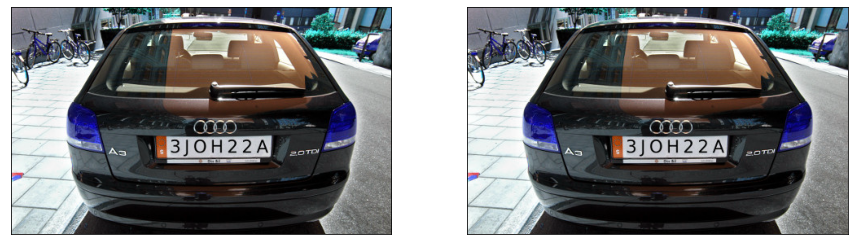

In [21]:
plot_images(image, image_copy)

In [22]:
plate = None
for c in cnts:
    perimeter = cv2.arcLength(c, True)
    edges_count = cv2.approxPolyDP(c, 0.02 * perimeter, True)
    if len(edges_count) == 4:
        x,y,w,h = cv2.boundingRect(c)
        plate = image[y:y+h, x:x+w]
        break

cv2.imwrite("plate.png", plate)

NameError: name 'cnts' is not defined

TypeError: Image data of dtype object cannot be converted to float

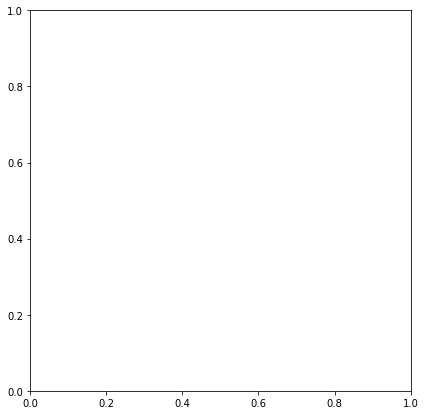

In [23]:
plot_images(plate, plate)

In [24]:
import pytesseract
text = pytesseract.image_to_string(plate, lang="eng")

TypeError: Unsupported image object

In [ ]:
print(text)